# Practica 1:


[2.69, 2.83, 4.37, 4.09, 3.88, 4.21, 2.97, 4.26, 3.32, 2.89]


,nombre,popularidad,duracion_minutos
0,"Signed, Sealed, Delivered (I'm Yours)",80,2.69
1,For Once In My Life,79,2.83
2,I Just Called To Say I Love You,78,4.37


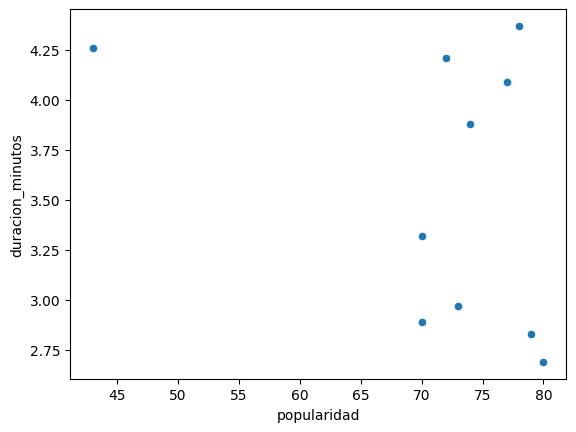

In [76]:
import os
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd
import spotipy
from dotenv import load_dotenv
from spotipy.oauth2 import SpotifyClientCredentials
load_dotenv()

client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')



spot = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id,
                                                              client_secret = client_secret))
SW_uri = 'spotify:artist:7guDJrEfX3qb6FEbdPA5qi'

top_10_tracks = spot.artist_top_tracks(SW_uri)

top10_name= []
top10_duration_ms = []
top10_popularity = []
for track in top_10_tracks['tracks'][:10]:
    top10_name.append(track['name'])
    top10_duration_ms.append(round((track['duration_ms']/1000)/60, 2))
    top10_popularity.append(track['popularity'])
    
print(top10_duration_ms)
top10_df = pd.DataFrame(list(zip(top10_name, top10_popularity, top10_duration_ms)), columns=['nombre', 'popularidad', 'duracion_minutos'])
display(top10_df.head(3))


sbn.scatterplot(x='popularidad', y='duracion_minutos', data=top10_df)
plt.show()

### Conclusiones
No se observa ninguna relación entre duración y popularidad. Casi todos los datos estan distribuidos en el mismo rango de 
popularidad independientemente de la duración de la canción a excepcion de 'That's What Friends Are For' que es realmente mala :)

intento extraer mas temas

In [82]:
#obtengo los albumes del cantante
albums = spot.artist_albums(SW_uri)
#se crea lista vacia donde almacenar los id de los albumes
complete_tracks_ids = []
#Albums es un diccionario anidado dentro del cual se encuentra la subclave 'items' donde se encuentran los ids
ids = albums['items']     
# iteramos dentro de album['items'] 
for album in ids:
    #en cada iteracion obtenemos el indice ['id'] del elemento album
    complete_tracks_ids.append(album['id'])
#muestra del resultado
for indice, value in enumerate(complete_tracks_ids):
        print(indice, value)


0 3wl8NRDyJ0EDQcj8gu2J3N
1 3gvuqyyvdMS8CbEwTLu5uL
2 6hu9W3TWiCF5sETB1pvrHl
3 1AjRRHn7aHgPxBWHlF5sO3
4 1xO2rklexBS68eSOqIU4Il
5 54vpVgdihAoRU6pmuoHaxf
6 1nLKZqTGA48v3I8dNFkvQt
7 1kbx6EnG9tGk6qiGkPbTFs
8 2g9Ij40DD7aPaG4hwa8Uab
9 1ZuQduJGh0lBynUsfzD1tH
10 3LSgLZrSXELqWt5eqb6XMY
11 6YUCc2RiXcEKS9ibuZxjt0
12 1kda4McF274Jl5x3aOAmPJ
13 5jgI8Eminx9MmLBontDWq8
14 3PResMqFgQYBfzTnqTKwQw
15 7n0bcoRDylRw5PUKn2PlRJ
16 2oV8OJKtyGR7MwXH45rOoE
17 5Ejztki15nFl3ts3SqjhKE
18 7u0RcxWUGoImmF4LgodaH8
19 0OP3OMK3KZgAwqFA7pgHl5


In [83]:
complete_tracks = []

for id in complete_tracks_ids:
    album_tracks = spot.album_tracks(id, offset=0, market='ES')
    complete_tracks.append(album_tracks)
complete_tracks

[{'href': 'https://api.spotify.com/v1/albums/3wl8NRDyJ0EDQcj8gu2J3N/tracks?offset=0&limit=50&market=ES',
  'items': [{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7guDJrEfX3qb6FEbdPA5qi'},
      'href': 'https://api.spotify.com/v1/artists/7guDJrEfX3qb6FEbdPA5qi',
      'id': '7guDJrEfX3qb6FEbdPA5qi',
      'name': 'Stevie Wonder',
      'type': 'artist',
      'uri': 'spotify:artist:7guDJrEfX3qb6FEbdPA5qi'}],
    'disc_number': 1,
    'duration_ms': 398428,
    'explicit': False,
    'external_urls': {'spotify': 'https://open.spotify.com/track/0eSKbUSv64d0Q49SVCl2M1'},
    'href': 'https://api.spotify.com/v1/tracks/0eSKbUSv64d0Q49SVCl2M1',
    'id': '0eSKbUSv64d0Q49SVCl2M1',
    'is_local': False,
    'is_playable': True,
    'name': 'Bird Of Beauty - Live 1975',
    'preview_url': 'https://p.scdn.co/mp3-preview/e42e3d50cd79be747cdb282727417bc1bc7e299b?cid=37439c2891954dec8a9173d2bb41dfcb',
    'track_number': 1,
    'type': 'track',
    'uri': 'spotify:tr

In [84]:
all_tracks_name= []
all_tracks_duration = []
all_tracks_track_number = []
for album in complete_tracks:
    tracks = album['items']
    for track in tracks:
        all_tracks_name.append(track['name'])
        all_tracks_duration.append(round((track['duration_ms']/1000)/60, 2))
        all_tracks_track_number.append(track['track_number'])


stevie_df =pd.DataFrame(list(zip(all_tracks_name, all_tracks_duration, all_tracks_track_number)), columns= ['name', 'duration', 'song number'])
stevie_df

,name,duration,song number
0,Bird Of Beauty - Live 1975,6.64,1
1,Contusion - Live 1975,2.16,2
2,Jam - Live 1975,3.10,3
3,Yea Ya Do - Live 1975,2.35,4
4,Higher Ground - Live 1975,4.36,5
...,...,...,...
275,Blowin' In The Wind - Live/1970,6.68,11
276,By The Time I Get To Phoenix - Live/1970,4.16,12
277,Ca' Purange - Live/1970,6.86,13
278,Alfie - Live/1970,5.14,14
